# Libraries and Data Loading

In [1]:
#Output All Results in a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
from scipy.stats import levene
from random import choices
import pingouin as pg

/Users/dairecrawford/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read in Data
kaggle_data = pd.read_csv("assignment1_clean_kaggle_data.csv")

kaggle_data.head()

/var/folders/mt/hhg0pl356j342qv5nnzk2j240000gn/T/ipykernel_17053/3088911701.py:2: DtypeWarning: Columns (285) have mixed types. Specify dtype option on import or set low_memory=False.
  kaggle_data = pd.read_csv("assignment1_clean_kaggle_data.csv")


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing 

In [3]:
#Renaming Question Columns
kaggle_data.rename(columns = {"Q1": "Age","Q2": "Gender","Q3": "Country","Q4": "Education","Q6": "Years_Experience",
                              "Q25": "Salary"}, inplace =True)

#Dropping Unused Columns
kaggle_data = kaggle_data.loc[:, ['Age', 'Gender', 'Country', 'Education', 'Years_Experience', 'Salary']]

#Renaming Variables
kaggle_data = kaggle_data.replace({'No formal education past high school': "High School"})
kaggle_data = kaggle_data.replace({'Some college/university study without earning a bachelor’s degree': "Post-Secondary,Incomplete"})

#checking for null values
kaggle_data.isnull().values.any() 

#Assessing Data Types
kaggle_data.dtypes

False

Age                 object
Gender              object
Country             object
Education           object
Years_Experience    object
Salary               int64
dtype: object

# Creating Data Subsets for Analysis

For questions 2 a-e, the analysis will utilize data specifically from men and women, with other gender responses removed.

Question 3 a-e, the analysis will utilize data specifically from Bachelors, Masters, and PhD with other responses removed.

In [4]:
#Education DF
edu_data=kaggle_data[((kaggle_data.Education != 'I prefer not to answer') 
                      &( kaggle_data.Education != "Professional doctorate")
                      &( kaggle_data.Education != "Post-Secondary,Incomplete")
                      &( kaggle_data.Education != "High School"))]

edu_data['Education'].value_counts() #checking column names and value counts

#Man/Woman DF
gender_data=kaggle_data[(( kaggle_data.Gender != "Prefer not to say")
                      &( kaggle_data.Gender != "Nonbinary")
                      &( kaggle_data.Gender != "Prefer to self-describe"))]

gender_data['Gender'].value_counts() #checking column names and value counts

Master’s degree      6799
Bachelor’s degree    4777
Doctoral degree      2217
Name: Education, dtype: int64

Man      12642
Woman     2482
Name: Gender, dtype: int64

# Exploratory Analysis of Entire Dataset 

In [5]:
#Data Dimensions
kaggle_data.shape # 15124 x 6 DF


#Capturing Value Counts
kaggle_data['Age'].value_counts()
kaggle_data['Gender'].value_counts()
kaggle_data['Country'].value_counts()
kaggle_data['Education'].value_counts()
kaggle_data['Years_Experience'].value_counts()
kaggle_data['Salary'].value_counts()




(15391, 6)

25-29    3235
30-34    2626
22-24    2092
35-39    1992
40-44    1528
45-49    1141
18-21     931
50-54     791
55-59     504
60-69     454
70+        97
Name: Age, dtype: int64

Man                        12642
Woman                       2482
Prefer not to say            196
Nonbinary                     47
Prefer to self-describe       24
Name: Gender, dtype: int64

India                                    3376
United States of America                 1845
Other                                     832
Japan                                     652
Brazil                                    544
                                         ... 
I do not wish to disclose my location      26
Norway                                     26
Uganda                                     24
Algeria                                    23
Kazakhstan                                 22
Name: Country, Length: 66, dtype: int64

Master’s degree              6799
Bachelor’s degree            4777
Doctoral degree              2217
Post-Secondary,Incomplete     746
I prefer not to answer        334
Professional doctorate        290
High School                   228
Name: Education, dtype: int64

1-3 years                    3691
< 1 years                    2463
3-5 years                    2461
5-10 years                   2345
10-20 years                  1846
20+ years                    1624
I have never written code     961
Name: Years_Experience, dtype: int64

1000       3369
2000        969
15000       950
40000       741
125000      725
7500        699
60000       697
50000       688
25000       587
3000        575
20000       573
10000       552
70000       551
30000       470
80000       464
5000        456
200000      392
90000       391
4000        380
150000      379
100000      350
250000      177
500000       91
1000000      90
300000       75
Name: Salary, dtype: int64

In [6]:
#Mean Salary for Each Variable 
kaggle_data.groupby("Age").mean()
kaggle_data.groupby("Gender").mean()
kaggle_data.groupby("Country").mean()
kaggle_data.groupby("Education").mean()
kaggle_data.groupby("Years_Experience").mean()


,Salary
Age,
18-21,15722.878625
22-24,19918.738050
25-29,29213.910355
30-34,47932.025895
35-39,59316.265060
40-44,67760.798429
45-49,82403.593339
50-54,82304.677623
55-59,97216.269841


,Salary
Gender,
Man,51193.600696
Nonbinary,121478.723404
Prefer not to say,75765.306122
Prefer to self-describe,74166.666667
Woman,34816.881547


,Salary
Country,
Algeria,21521.739130
Argentina,26097.014925
Australia,116520.512821
Austria,75486.842105
Bangladesh,7479.310345
...,...
Ukraine,24359.504132
United Arab Emirates,80960.000000
United Kingdom of Great Britain and Northern Ireland,86084.022039


,Salary
Education,
Bachelor’s degree,35578.291815
Doctoral degree,70641.181777
High School,38208.333333
I prefer not to answer,34191.616766
Master’s degree,52706.868657
"Post-Secondary,Incomplete",41990.616622
Professional doctorate,67465.517241


,Salary
Years_Experience,
1-3 years,27763.885126
10-20 years,83355.904659
20+ years,105358.682266
3-5 years,40831.369362
5-10 years,62156.716418
< 1 years,22604.141291
I have never written code,27651.404787


In [7]:
#Median Salary for Each Variable
kaggle_data.groupby("Age").median()
kaggle_data.groupby("Gender").median()
kaggle_data.groupby("Country").median()
kaggle_data.groupby("Education").median()
kaggle_data.groupby("Years_Experience").median()

,Salary
Age,
18-21,1000.0
22-24,3000.0
25-29,10000.0
30-34,25000.0
35-39,25000.0
40-44,40000.0
45-49,50000.0
50-54,50000.0
55-59,60000.0


,Salary
Gender,
Man,20000.0
Nonbinary,60000.0
Prefer not to say,20000.0
Prefer to self-describe,15000.0
Woman,7500.0


,Salary
Country,
Algeria,2000.0
Argentina,10000.0
Australia,100000.0
Austria,50000.0
Bangladesh,2000.0
...,...
Ukraine,7500.0
United Arab Emirates,40000.0
United Kingdom of Great Britain and Northern Ireland,60000.0


,Salary
Education,
Bachelor’s degree,7500.0
Doctoral degree,40000.0
High School,7500.0
I prefer not to answer,4000.0
Master’s degree,25000.0
"Post-Secondary,Incomplete",10000.0
Professional doctorate,20000.0


,Salary
Years_Experience,
1-3 years,5000.0
10-20 years,55000.0
20+ years,70000.0
3-5 years,15000.0
5-10 years,30000.0
< 1 years,4000.0
I have never written code,5000.0


In [8]:
#salary statistics
kaggle_data.mean()
kaggle_data.median()
kaggle_data.std()

/var/folders/mt/hhg0pl356j342qv5nnzk2j240000gn/T/ipykernel_17053/608341121.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kaggle_data.mean()


Salary    49116.009356
dtype: float64

/var/folders/mt/hhg0pl356j342qv5nnzk2j240000gn/T/ipykernel_17053/608341121.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kaggle_data.median()


Salary    15000.0
dtype: float64

/var/folders/mt/hhg0pl356j342qv5nnzk2j240000gn/T/ipykernel_17053/608341121.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kaggle_data.std()


Salary    98090.207788
dtype: float64

Text(0.5, 0.98, 'Distribution of Salaries Across All Data')

<AxesSubplot:xlabel='Salary', ylabel='Count'>

(0.0, 1000000.0)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

(0.0, 250000.0)

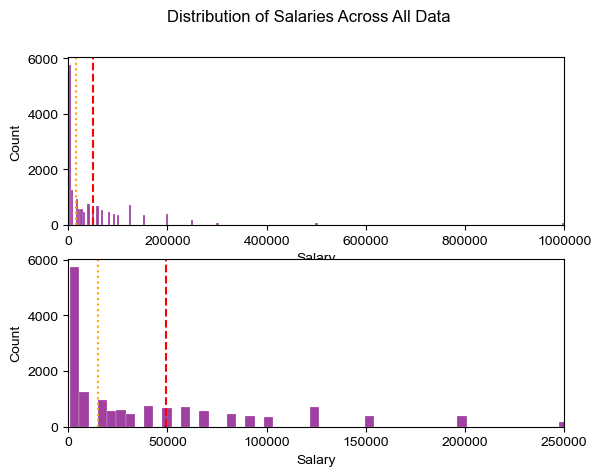

In [9]:
#Overall Salary Trend in the Data

fig, axes = plt.subplots(2,1, sharey = "all")
fig.suptitle('Distribution of Salaries Across All Data')

sns.set(rc={'axes.facecolor':'#F8F8F8'})
sns.histplot(data=kaggle_data, x ="Salary", bins = "auto", color = "purple", ax=axes[0])
axes[0].set_xlim(0, kaggle_data["Salary"].max()) 
axes[0].axvline(x=kaggle_data["Salary"].mean(), color='red', ls = "--")
axes[0].axvline(x=kaggle_data["Salary"].median(), color='orange', ls = "dotted")
axes[0].ticklabel_format(style='plain') #remove scientific notation

#Without Outliers
sns.set(rc={'axes.facecolor':'#F8F8F8'})
sns.histplot(data=kaggle_data, x ="Salary", bins = "auto", color = "purple",  ax=axes[1])
axes[1].set_xlim(0, 250000) 
axes[1].axvline(x=kaggle_data["Salary"].mean(), color='red', ls = "--")
axes[1].axvline(x=kaggle_data["Salary"].median(), color='orange', ls = "dotted")
axes[1].ticklabel_format(style='plain') #remove scientific notation
plt.show()

[Text(0.5, 1.0, 'Salary in Relation to Education and Gender')]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'High School'),
  Text(1, 0, 'Post-Secondary,Incomplete'),
  Text(2, 0, 'Bachelor’s degree'),
  Text(3, 0, 'Master’s degree'),
  Text(4, 0, 'Doctoral degree'),
  Text(5, 0, 'Professional doctorate')])

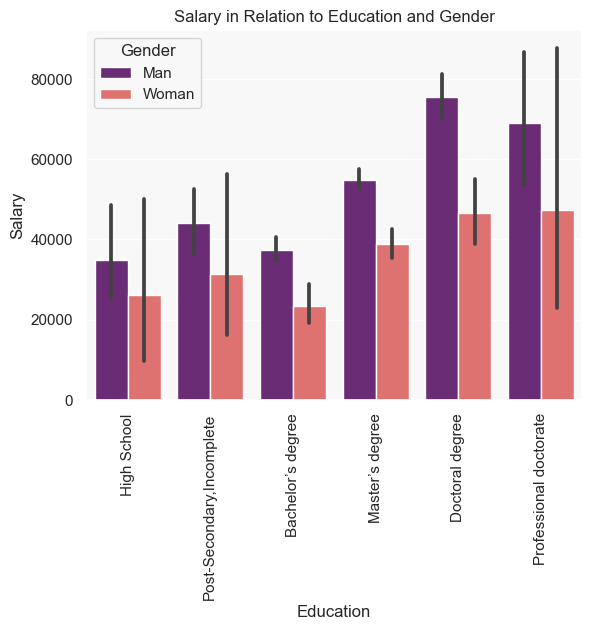

In [10]:
#Exploring Influence of Education and Gender on Salary

order = ["High School", "Post-Secondary,Incomplete", "Bachelor’s degree", 
         "Master’s degree", "Doctoral degree", "Professional doctorate"]

sns.set(rc={'axes.facecolor':'#F8F8F8'})
sns.barplot(data=gender_data.loc[(gender_data["Education"] != "I prefer not to answer")],
            x="Education",
            y="Salary",
            hue="Gender",
            order = order,
            palette="magma").set(title = "Salary in Relation to Education and Gender")
plt.xticks(rotation = 90) #rotate x tick labels 
plt.show()

[Text(0.5, 1.0, 'Average Salary by Age Group')]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '18-21'),
  Text(1, 0, '22-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-69'),
  Text(10, 0, '70+')])

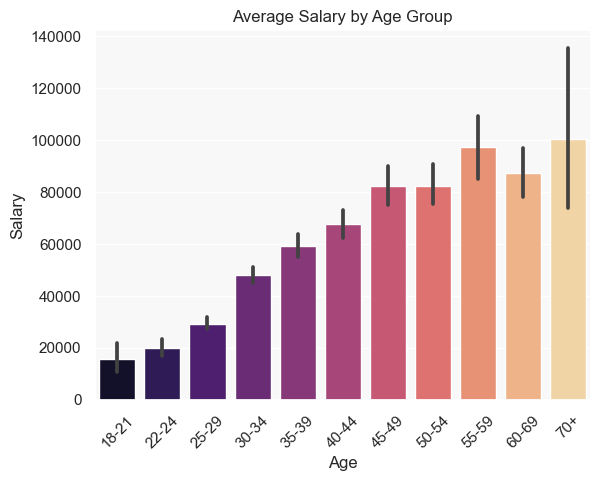

In [11]:
#Exploring Influence of Age on Salary

order = ["18-21", "22-24", "25-29","30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

sns.set(rc={'axes.facecolor':'#F8F8F8'})
sns.barplot(data=kaggle_data, x="Age", 
            y="Salary",
            palette="magma", 
            order = order).set(title = "Average Salary by Age Group")
plt.xticks(rotation = 45)
plt.show()

# Question 2
Estimating the difference between average salary (Q25) of men vs. women (Q2).

This section will be utilizing the gender_data dataframe, containing only "Man" and "Woman" responses to the survey.

In [12]:
#Question 2a) Descriptive Statistics for each group
gender_data.groupby("Gender").describe()

gender_data.groupby("Age").median()
gender_data.groupby("Gender").median()
gender_data.groupby("Country").median()
gender_data.groupby("Education").median()



Salary                                                                \
          count          mean           std     min     25%      50%      75%   
Gender                                                                          
Man     12642.0  51193.600696  99979.274378  1000.0  2000.0  20000.0  60000.0   
Woman    2482.0  34816.881547  72017.347888  1000.0  1000.0   7500.0  50000.0   

                   
              max  
Gender             
Man     1000000.0  
Woman   1000000.0

,Salary
Age,
18-21,1000.0
22-24,3000.0
25-29,7500.0
30-34,25000.0
35-39,25000.0
40-44,40000.0
45-49,50000.0
50-54,50000.0
55-59,60000.0


,Salary
Gender,
Man,20000.0
Woman,7500.0


,Salary
Country,
Algeria,2000.0
Argentina,10000.0
Australia,95000.0
Austria,50000.0
Bangladesh,2000.0
...,...
Ukraine,7500.0
United Arab Emirates,40000.0
United Kingdom of Great Britain and Northern Ireland,60000.0


,Salary
Education,
Bachelor’s degree,7500.0
Doctoral degree,40000.0
High School,7500.0
I prefer not to answer,4000.0
Master’s degree,25000.0
"Post-Secondary,Incomplete",10000.0
Professional doctorate,20000.0


### Question 2b) Assessing the Suitability of a Two Sample T-Test

[Text(0.5, 1.0, 'Distribution of Salary for Men')]

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

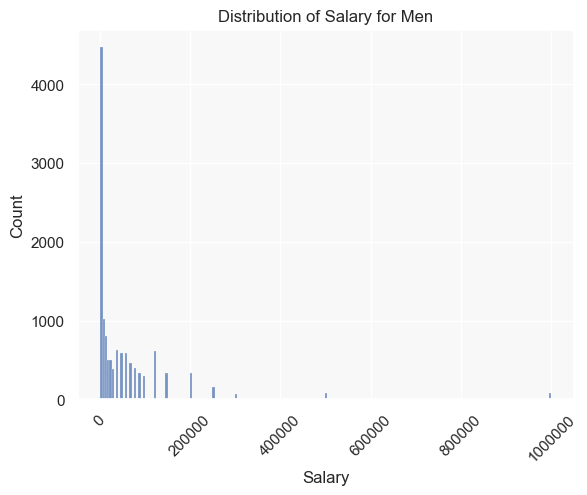

[Text(0.5, 1.0, 'Distribution of Salary for Women')]

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

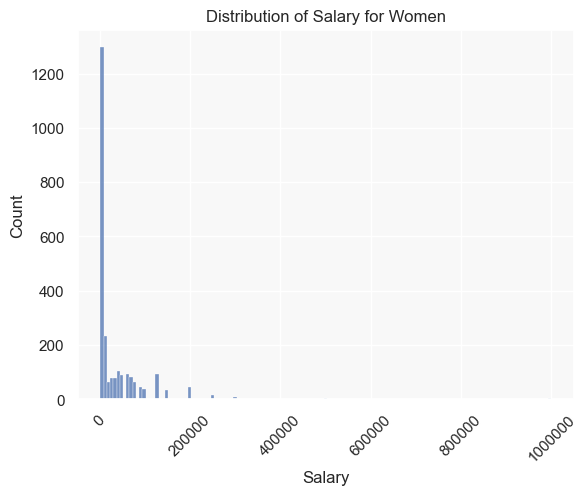

In [13]:
#Plots of Salary Distributions

#Men
sns.histplot(data=gender_data.loc[gender_data["Gender"] == "Man"],
             x ="Salary",
             bins = "auto").set(title = "Distribution of Salary for Men")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#Women
sns.histplot(data=gender_data.loc[gender_data["Gender"] == "Woman"],
             x ="Salary", 
             bins = "auto").set(title = "Distribution of Salary for Women")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()


((array([-3.91167083, -3.69201004, -3.57166007, ...,  3.57166007,
          3.69201004,  3.91167083]),
  array([   1000,    1000,    1000, ..., 1000000, 1000000, 1000000])),
 (65719.21598721795, 48506.016926738936, 0.6834293122123462))

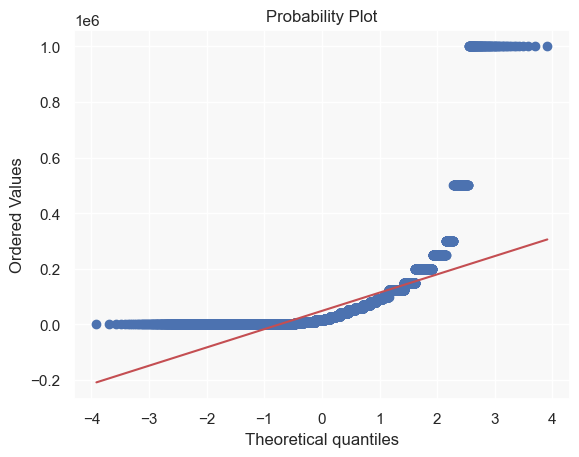

In [14]:
#Q-Q Plot to Confirm Non-Normal Distribution
stats.probplot(gender_data["Salary"], dist="norm", plot=pylab)
pylab.show()

In [15]:
#Levene Test for Equal Variance

levene(gender_data.loc[gender_data["Gender"] == "Man","Salary"], 
       gender_data.loc[gender_data["Gender"] == "Woman","Salary"]) #p value below 0.05


LeveneResult(statistic=47.0171552949757, pvalue=7.309414887535396e-12)

### Question 2c) Bootstrapping the Data

In [16]:
#Getting counts of men and women in the data
gender_data.groupby("Gender").size()
#12642 men
#2482 women

#Creating Data Subsets
men_df = gender_data.loc[gender_data["Gender"] == "Man"]
women_df = gender_data.loc[gender_data["Gender"] == "Woman"]

Gender
Man      12642
Woman     2482
dtype: int64

In [17]:
#Bootstrapping Data
boot_men = choices(list(men_df["Salary"]), k=12642)
boot_women = choices(list(women_df["Salary"]), k=2482)


#Saving Bootstrapped means to a list
men_mean = []
women_mean = []


for i in np.arange(1000):
    rand_sample_men = choices(list(men_df["Salary"]), k=12642)
    rand_sample_women = choices(list(women_df["Salary"]), k=2482)
    men_mean.append(np.mean(rand_sample_men))
    women_mean.append(np.mean(rand_sample_women))

In [18]:
#checking means
np.mean(men_mean)
np.mean(women_mean)

51194.312846068664

34819.9379532635

(array([ 17.,  35.,  99., 203., 215., 202., 137.,  63.,  23.,   6.]),
 array([48639.49533302, 49181.97278912, 49724.45024521, 50266.92770131,
        50809.40515741, 51351.88261351, 51894.36006961, 52436.83752571,
        52979.31498181, 53521.79243791, 54064.269894  ]),
 <BarContainer object of 10 artists>)

(array([  8.,  55., 113., 201., 229., 209., 122.,  45.,  15.,   3.]),
 array([30812.85253828, 31699.09347301, 32585.33440774, 33471.57534247,
        34357.8162772 , 35244.05721193, 36130.29814666, 37016.53908139,
        37902.78001612, 38789.02095085, 39675.26188558]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Difference in Distribution of Sample Means')

Text(0.5, 0, 'Salary')

Text(0, 0.5, 'Count')

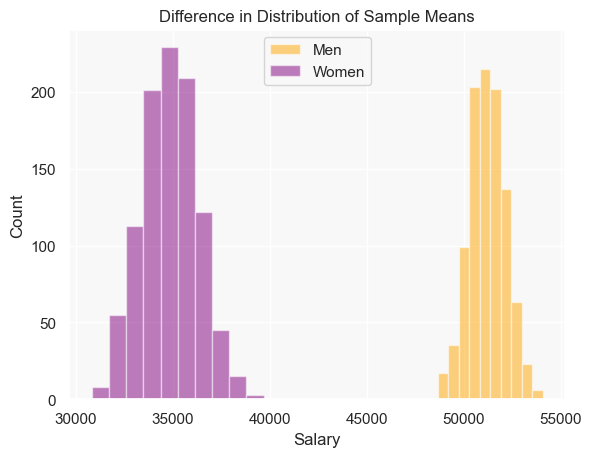

In [19]:
#Plotting the distribution difference in the means

plt.hist(men_mean, 
         alpha=0.5, 
         label="Men",
         color='orange')

plt.hist(women_mean, 
         alpha=0.5, 
         label="Women",
         color='purple')
plt.title("Difference in Distribution of Sample Means")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc='upper center')
plt.show()


### Question 2d) Performing Two Sample T-Test on Bootstrapped Data

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, "Bootstrapped Distribution of Men's Salary")

(array([48000., 49000., 50000., 51000., 52000., 53000., 54000., 55000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

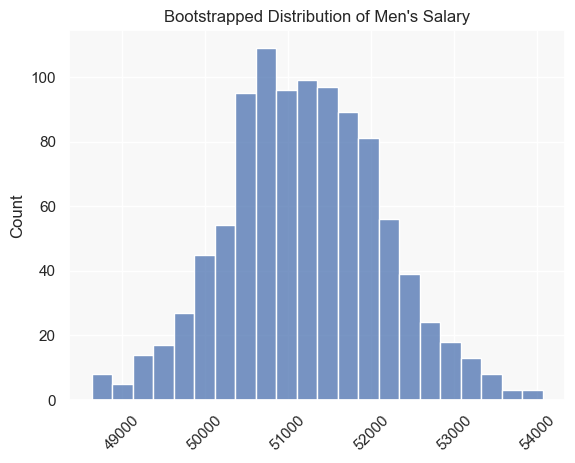

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, "Bootstrapped Distribution of Women's Salary")

(array([30000., 32000., 34000., 36000., 38000., 40000., 42000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

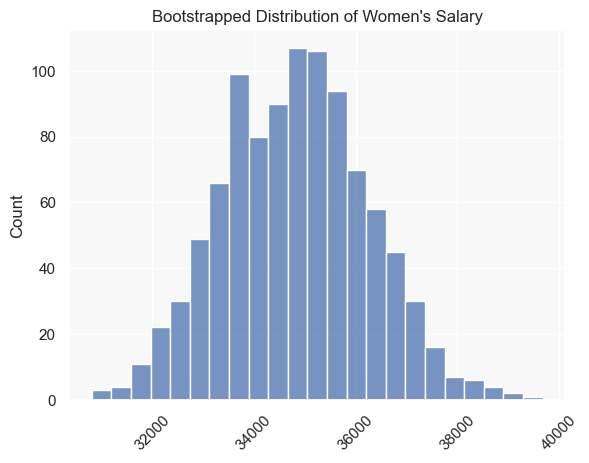

In [20]:
#Plots of Salary Distributions for Bootstrapped Data

#men
sns.histplot(data=men_mean, bins = "auto")
plt.title("Bootstrapped Distribution of Men's Salary")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#women
sns.histplot(data=women_mean, bins = "auto")
plt.title("Bootstrapped Distribution of Women's Salary")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

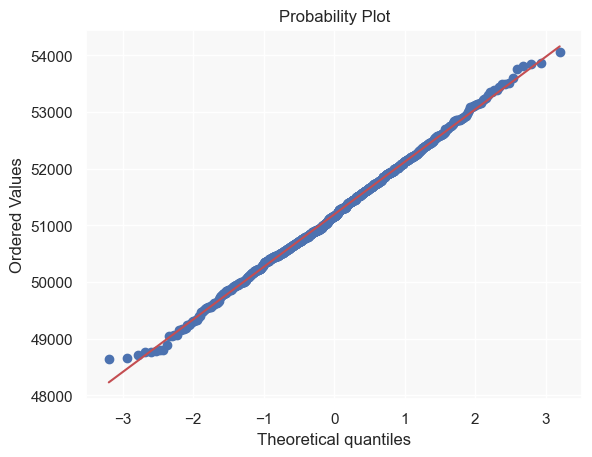

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

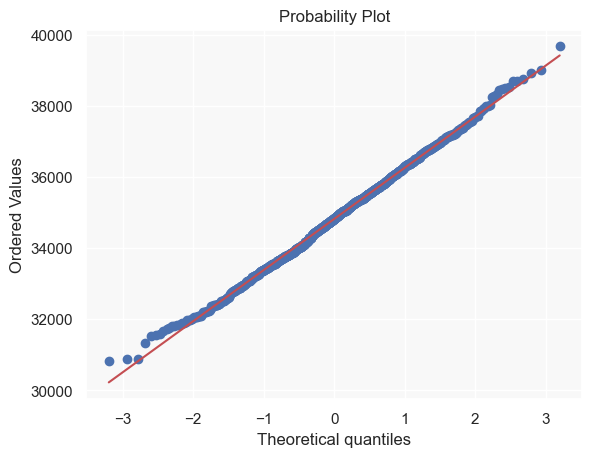

In [21]:
# Q-Q Plot to confirm Normality
stats.probplot(men_mean, dist="norm", plot=pylab)
pylab.show()

stats.probplot(women_mean, dist="norm", plot=pylab)
pylab.show()

In [22]:
#Levene's Test to Check Variance
levene(men_mean, women_mean) #still small p value

LeveneResult(statistic=169.1665995505675, pvalue=3.478010426296815e-37)

In [23]:
#Performing Welch's T-Test
## Bootstrapped data still has unequal variance, Welch's T-Test only requires normal distribution
stats.ttest_ind(men_mean, women_mean, equal_var = False)

Ttest_indResult(statistic=302.9927978787909, pvalue=0.0)

## Question 3

### Question 3a) Descriptive Statistics

In [24]:
#descriptive stats for the data
edu_data.groupby("Education").describe()

edu_data.groupby("Age").median()
edu_data.groupby("Gender").median()
edu_data.groupby("Country").median()
edu_data.groupby("Education").median()

Salary                                               \
                    count          mean            std     min     25%   
Education                                                                
Bachelor’s degree  4777.0  35578.291815   89382.060777  1000.0  1000.0   
Doctoral degree    2217.0  70641.181777  117160.947589  1000.0  4000.0   
Master’s degree    6799.0  52706.868657   90928.786678  1000.0  3000.0   

                                                
                       50%      75%        max  
Education                                       
Bachelor’s degree   7500.0  40000.0  1000000.0  
Doctoral degree    40000.0  90000.0  1000000.0  
Master’s degree    25000.0  70000.0  1000000.0

,Salary
Age,
18-21,1000.0
22-24,4000.0
25-29,10000.0
30-34,25000.0
35-39,30000.0
40-44,40000.0
45-49,60000.0
50-54,60000.0
55-59,70000.0


,Salary
Gender,
Man,20000.0
Nonbinary,55000.0
Prefer not to say,30000.0
Prefer to self-describe,20000.0
Woman,7500.0


,Salary
Country,
Algeria,1500.0
Argentina,15000.0
Australia,90000.0
Austria,50000.0
Bangladesh,2000.0
...,...
Ukraine,7500.0
United Arab Emirates,50000.0
United Kingdom of Great Britain and Northern Ireland,70000.0


,Salary
Education,
Bachelor’s degree,7500.0
Doctoral degree,40000.0
Master’s degree,25000.0


### Question 3b) Checking Assumptions for ANOVA Test


<AxesSubplot:xlabel='Salary', ylabel='Count'>

Text(0.5, 1.0, "Salary Distribution for Individuals with Bachelor's Degrees")

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

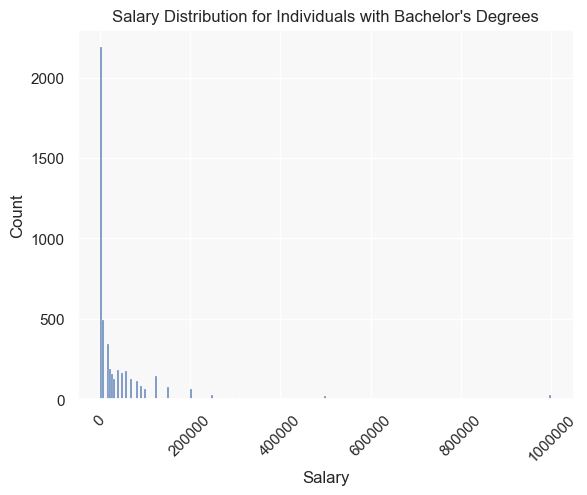

<AxesSubplot:xlabel='Salary', ylabel='Count'>

Text(0.5, 1.0, "Salary Distribution for Individuals with Master's Degrees")

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

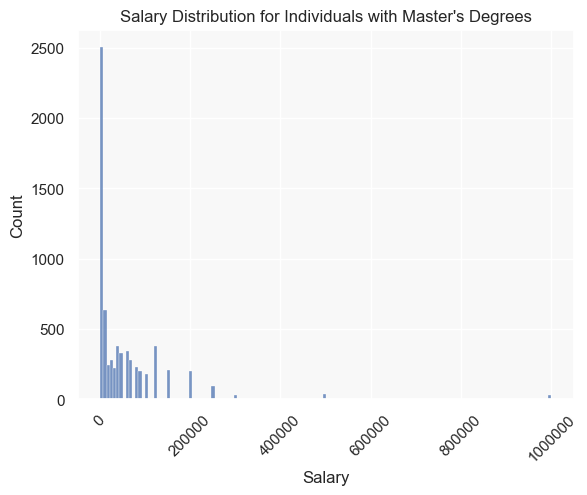

<AxesSubplot:xlabel='Salary', ylabel='Count'>

Text(0.5, 1.0, 'Salary Distribution for Individuals with Doctoral Degrees')

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

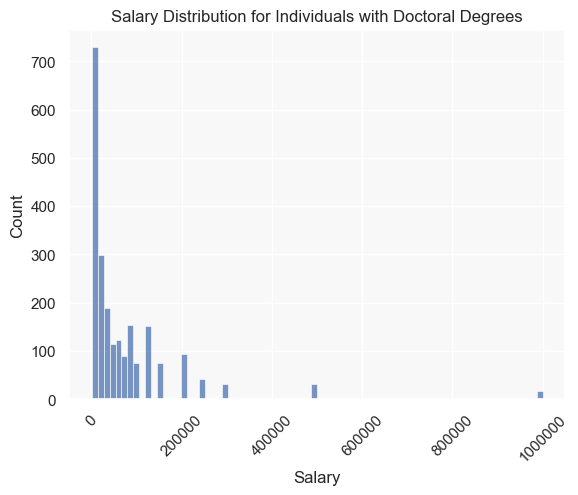

In [25]:
#Plot of Distribution
#Bachelors
sns.histplot(data=edu_data.loc[edu_data["Education"] == "Bachelor’s degree"], x ="Salary", bins = "auto")
plt.title("Salary Distribution for Individuals with Bachelor's Degrees")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#masters
sns.histplot(data=edu_data.loc[edu_data["Education"] == "Master’s degree"], x ="Salary", bins = "auto")
plt.title("Salary Distribution for Individuals with Master's Degrees")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#PhD
sns.histplot(data=edu_data.loc[edu_data["Education"] == "Doctoral degree"], x ="Salary", bins = "auto")
plt.title("Salary Distribution for Individuals with Doctoral Degrees")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

((array([-3.88937053, -3.66852077, -3.54746656, ...,  3.54746656,
          3.66852077,  3.88937053]),
  array([   1000,    1000,    1000, ..., 1000000, 1000000, 1000000])),
 (66465.81733105452, 49657.28992967446, 0.6931199304007578))

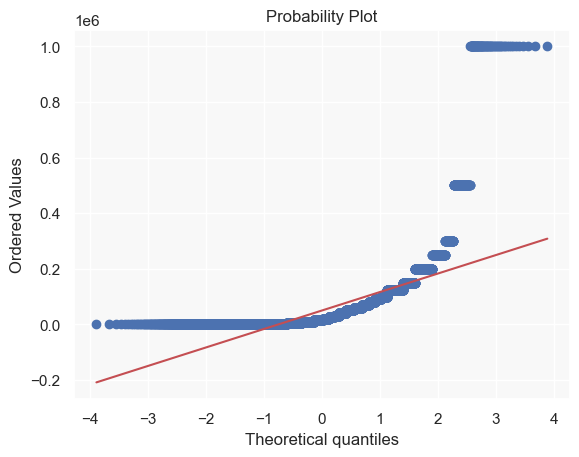

In [26]:
# Q-Q Plot To Confirm Non-Normality 
stats.probplot(edu_data["Salary"], dist="norm", plot=pylab)
pylab.show()

In [27]:
#Levene's Test for Equal Variance
levene(kaggle_data.loc[kaggle_data["Education"] == "Bachelor’s degree","Salary"],
       kaggle_data.loc[kaggle_data["Education"] == "Master’s degree","Salary"],
       kaggle_data.loc[kaggle_data["Education"] == "Doctoral degree","Salary"])

LeveneResult(statistic=79.54751302920215, pvalue=4.47423511714484e-35)

### Question 3c) Bootstrapping Data

In [28]:
#Count of Degrees
edu_data.groupby("Education").size()
#bsc = 4777
#msc = 6799
#phd = 2217

Education
Bachelor’s degree    4777
Doctoral degree      2217
Master’s degree      6799
dtype: int64

In [29]:
bsc_mean = []
msc_mean = []
phd_mean = []


for i in np.arange(1000):
    rand_sample_bsc = choices(list(edu_data.loc[edu_data["Education"] == "Bachelor’s degree", "Salary"]), k=4777)
    rand_sample_msc = choices(list(edu_data.loc[edu_data["Education"] == "Master’s degree", "Salary"]), k=6799)
    rand_sample_phd = choices(list(edu_data.loc[edu_data["Education"] == "Doctoral degree", "Salary"]), k=2217)
    bsc_mean.append(np.mean(rand_sample_bsc))
    msc_mean.append(np.mean(rand_sample_msc))
    phd_mean.append(np.mean(rand_sample_phd))

In [30]:
#Bootstrapped Means
np.mean(bsc_mean)
np.mean(msc_mean)
np.mean(phd_mean)

35641.29191961482

52749.55030151493

70735.43549842128

(array([  7.,  12.,  96., 173., 238., 235., 140.,  79.,  15.,   5.]),
 array([31399.83253088, 32263.66966716, 33127.50680343, 33991.34393971,
        34855.18107599, 35719.01821227, 36582.85534855, 37446.69248482,
        38310.5296211 , 39174.36675738, 40038.20389366]),
 <BarContainer object of 10 artists>)

(array([  8.,  46., 113., 205., 241., 221., 107.,  46.,   8.,   5.]),
 array([49600.1617885 , 50296.18326224, 50992.20473599, 51688.22620974,
        52384.24768348, 53080.26915723, 53776.29063098, 54472.31210472,
        55168.33357847, 55864.35505221, 56560.37652596]),
 <BarContainer object of 10 artists>)

(array([  3.,   8.,  50., 183., 267., 247., 158.,  61.,  17.,   6.]),
 array([61814.38881371, 63586.28777627, 65358.18673884, 67130.0857014 ,
        68901.98466396, 70673.88362652, 72445.78258908, 74217.68155165,
        75989.58051421, 77761.47947677, 79533.37843933]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Sample Means')

Text(0.5, 0, 'Salary')

Text(0, 0.5, 'Count')

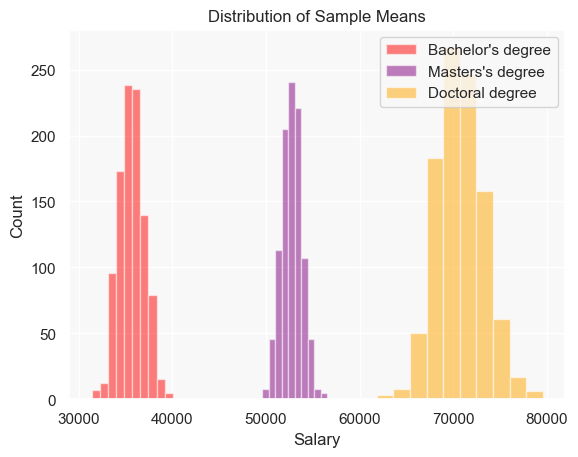

In [31]:
#Plotting the distribution difference in the means

plt.hist(bsc_mean, 
         alpha=0.5, 
         label="Bachelor's degree",
         color='red')

plt.hist(msc_mean, 
         alpha=0.5, 
         label="Masters's degree",
         color='purple')
  
plt.hist(phd_mean, 
         alpha=0.5, 
         label="Doctoral degree",
         color='orange')
plt.title("Distribution of Sample Means")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()



### Question 3d) ANOVA on Bootstrapped Data

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, "Distribution of Sample Means for Bachelor's Degrees")

Text(0.5, 0, 'Salary')

(array([30000., 32000., 34000., 36000., 38000., 40000., 42000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

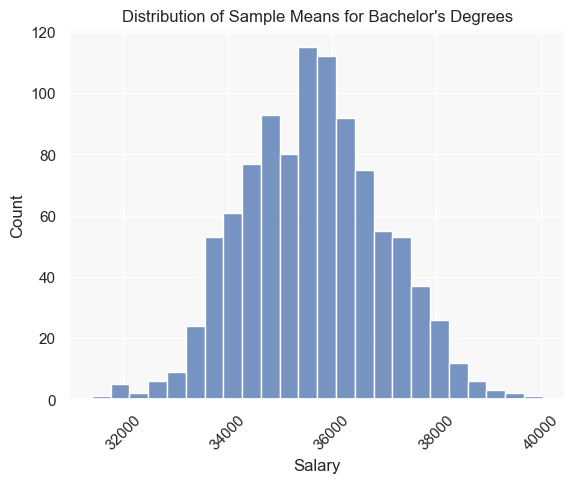

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, "Distribution of Sample Means for Master's Degrees")

Text(0.5, 0, 'Salary')

(array([49000., 50000., 51000., 52000., 53000., 54000., 55000., 56000.,
        57000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

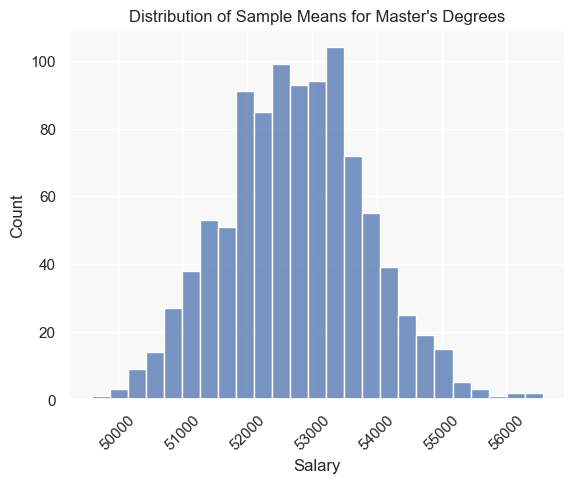

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Sample Means for Doctoral Degrees')

Text(0.5, 0, 'Salary')

(array([60000., 62500., 65000., 67500., 70000., 72500., 75000., 77500.,
        80000., 82500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

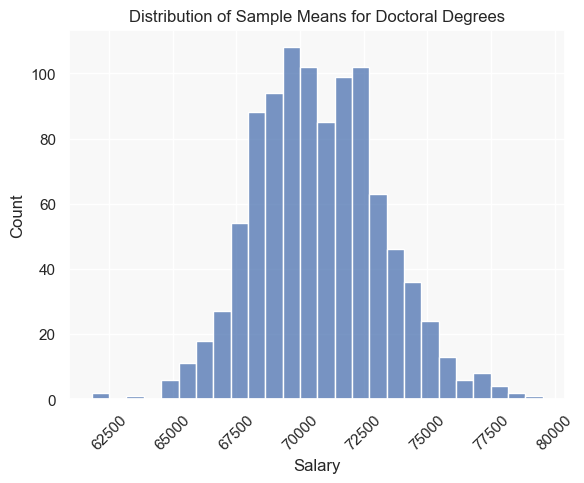

In [32]:
#Checking Normality of Bootstrapped Data

#Plot of Distributions

#Bachelors
sns.histplot(data=bsc_mean, bins = "auto")
plt.title("Distribution of Sample Means for Bachelor's Degrees")
plt.xlabel("Salary")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#masters
sns.histplot(data=msc_mean, bins = "auto")
plt.title("Distribution of Sample Means for Master's Degrees")
plt.xlabel("Salary")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

#PhD
sns.histplot(data=phd_mean, bins = "auto")
plt.title("Distribution of Sample Means for Doctoral Degrees")
plt.xlabel("Salary")
plt.ticklabel_format(style='plain') #remove scientific notation
plt.xticks(rotation = 45)
plt.show()

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

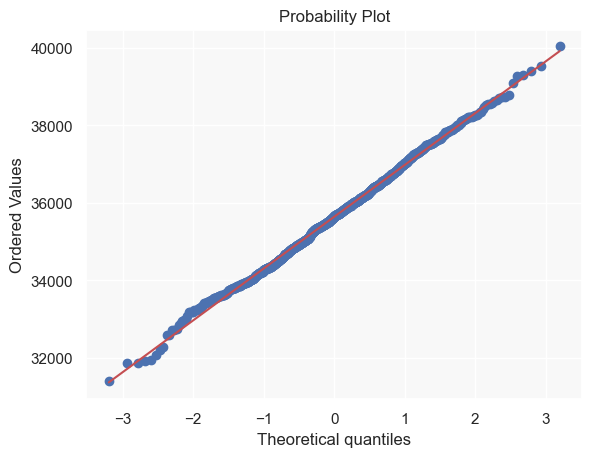

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

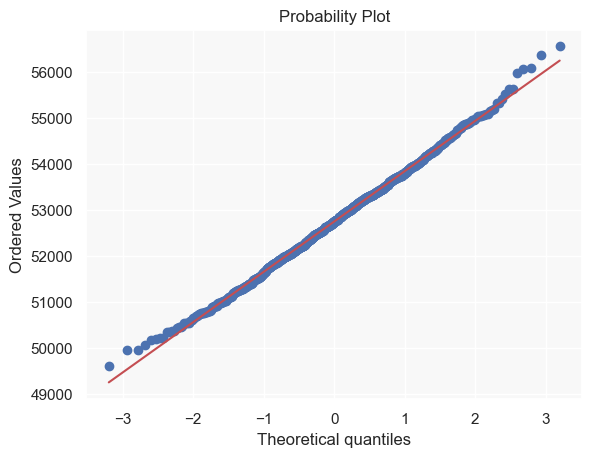

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

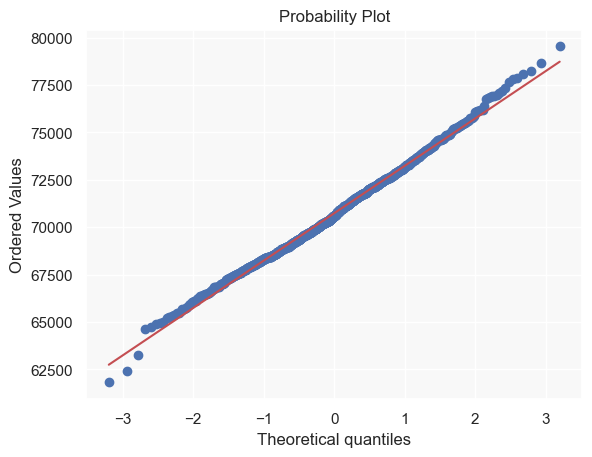

In [33]:
#Q-Q Plot to Confirm Normality

#bsc
stats.probplot(bsc_mean, dist="norm", plot=pylab)
pylab.show()

#msc
stats.probplot(msc_mean, dist="norm", plot=pylab)
pylab.show()

#phd
stats.probplot(phd_mean, dist="norm", plot=pylab)
pylab.show()

In [34]:
#Levene's Test for Equal Variance
levene(bsc_mean, msc_mean, phd_mean) #p-value below 0.05, unequal variance

LeveneResult(statistic=334.2992424569652, pvalue=8.789478985332886e-132)

In [35]:
#Welch's ANOVA for unequal variance
pg.welch_anova(dv='Salary', between="Education"  , data=edu_data)

,Source,ddof1,ddof2,F,p-unc,np2
0,Education,2,5570.351587,96.621721,5.612779e-42,0.015669


In [36]:
#Games Howell post-hoc test to determine which groups are statistically significant
pg.pairwise_gameshowell(dv='Salary', between='Education', data=edu_data) # all groups are significantly different


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Bachelor’s degree,Doctoral degree,35578.291815,70641.181777,-35062.889962,2804.278894,-12.503353,3457.766716,8.795187e-13,-0.354014
1,Bachelor’s degree,Master’s degree,35578.291815,52706.868657,-17128.576842,1699.555297,-10.078270,10388.015311,1.602052e-12,-0.189686
2,Doctoral degree,Master’s degree,70641.181777,52706.868657,17934.313120,2721.695666,6.589390,3132.569650,1.552711e-10,0.182931
